In [35]:
from PIL import Image
import numpy as np

## Cluster 4: 2484 racks

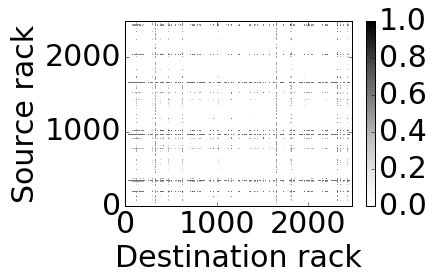

In [36]:
im = Image.open('cluster-4.png').convert('L')  # RGB to gray scale
im

In [37]:
im.mode, im.size

('L', (432, 280))

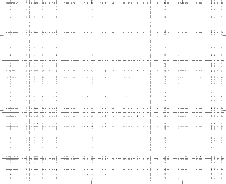

In [38]:
left   = 126
top    = 22
right  = 352
bottom = 206
im = im.crop((left, top, right, bottom))
im

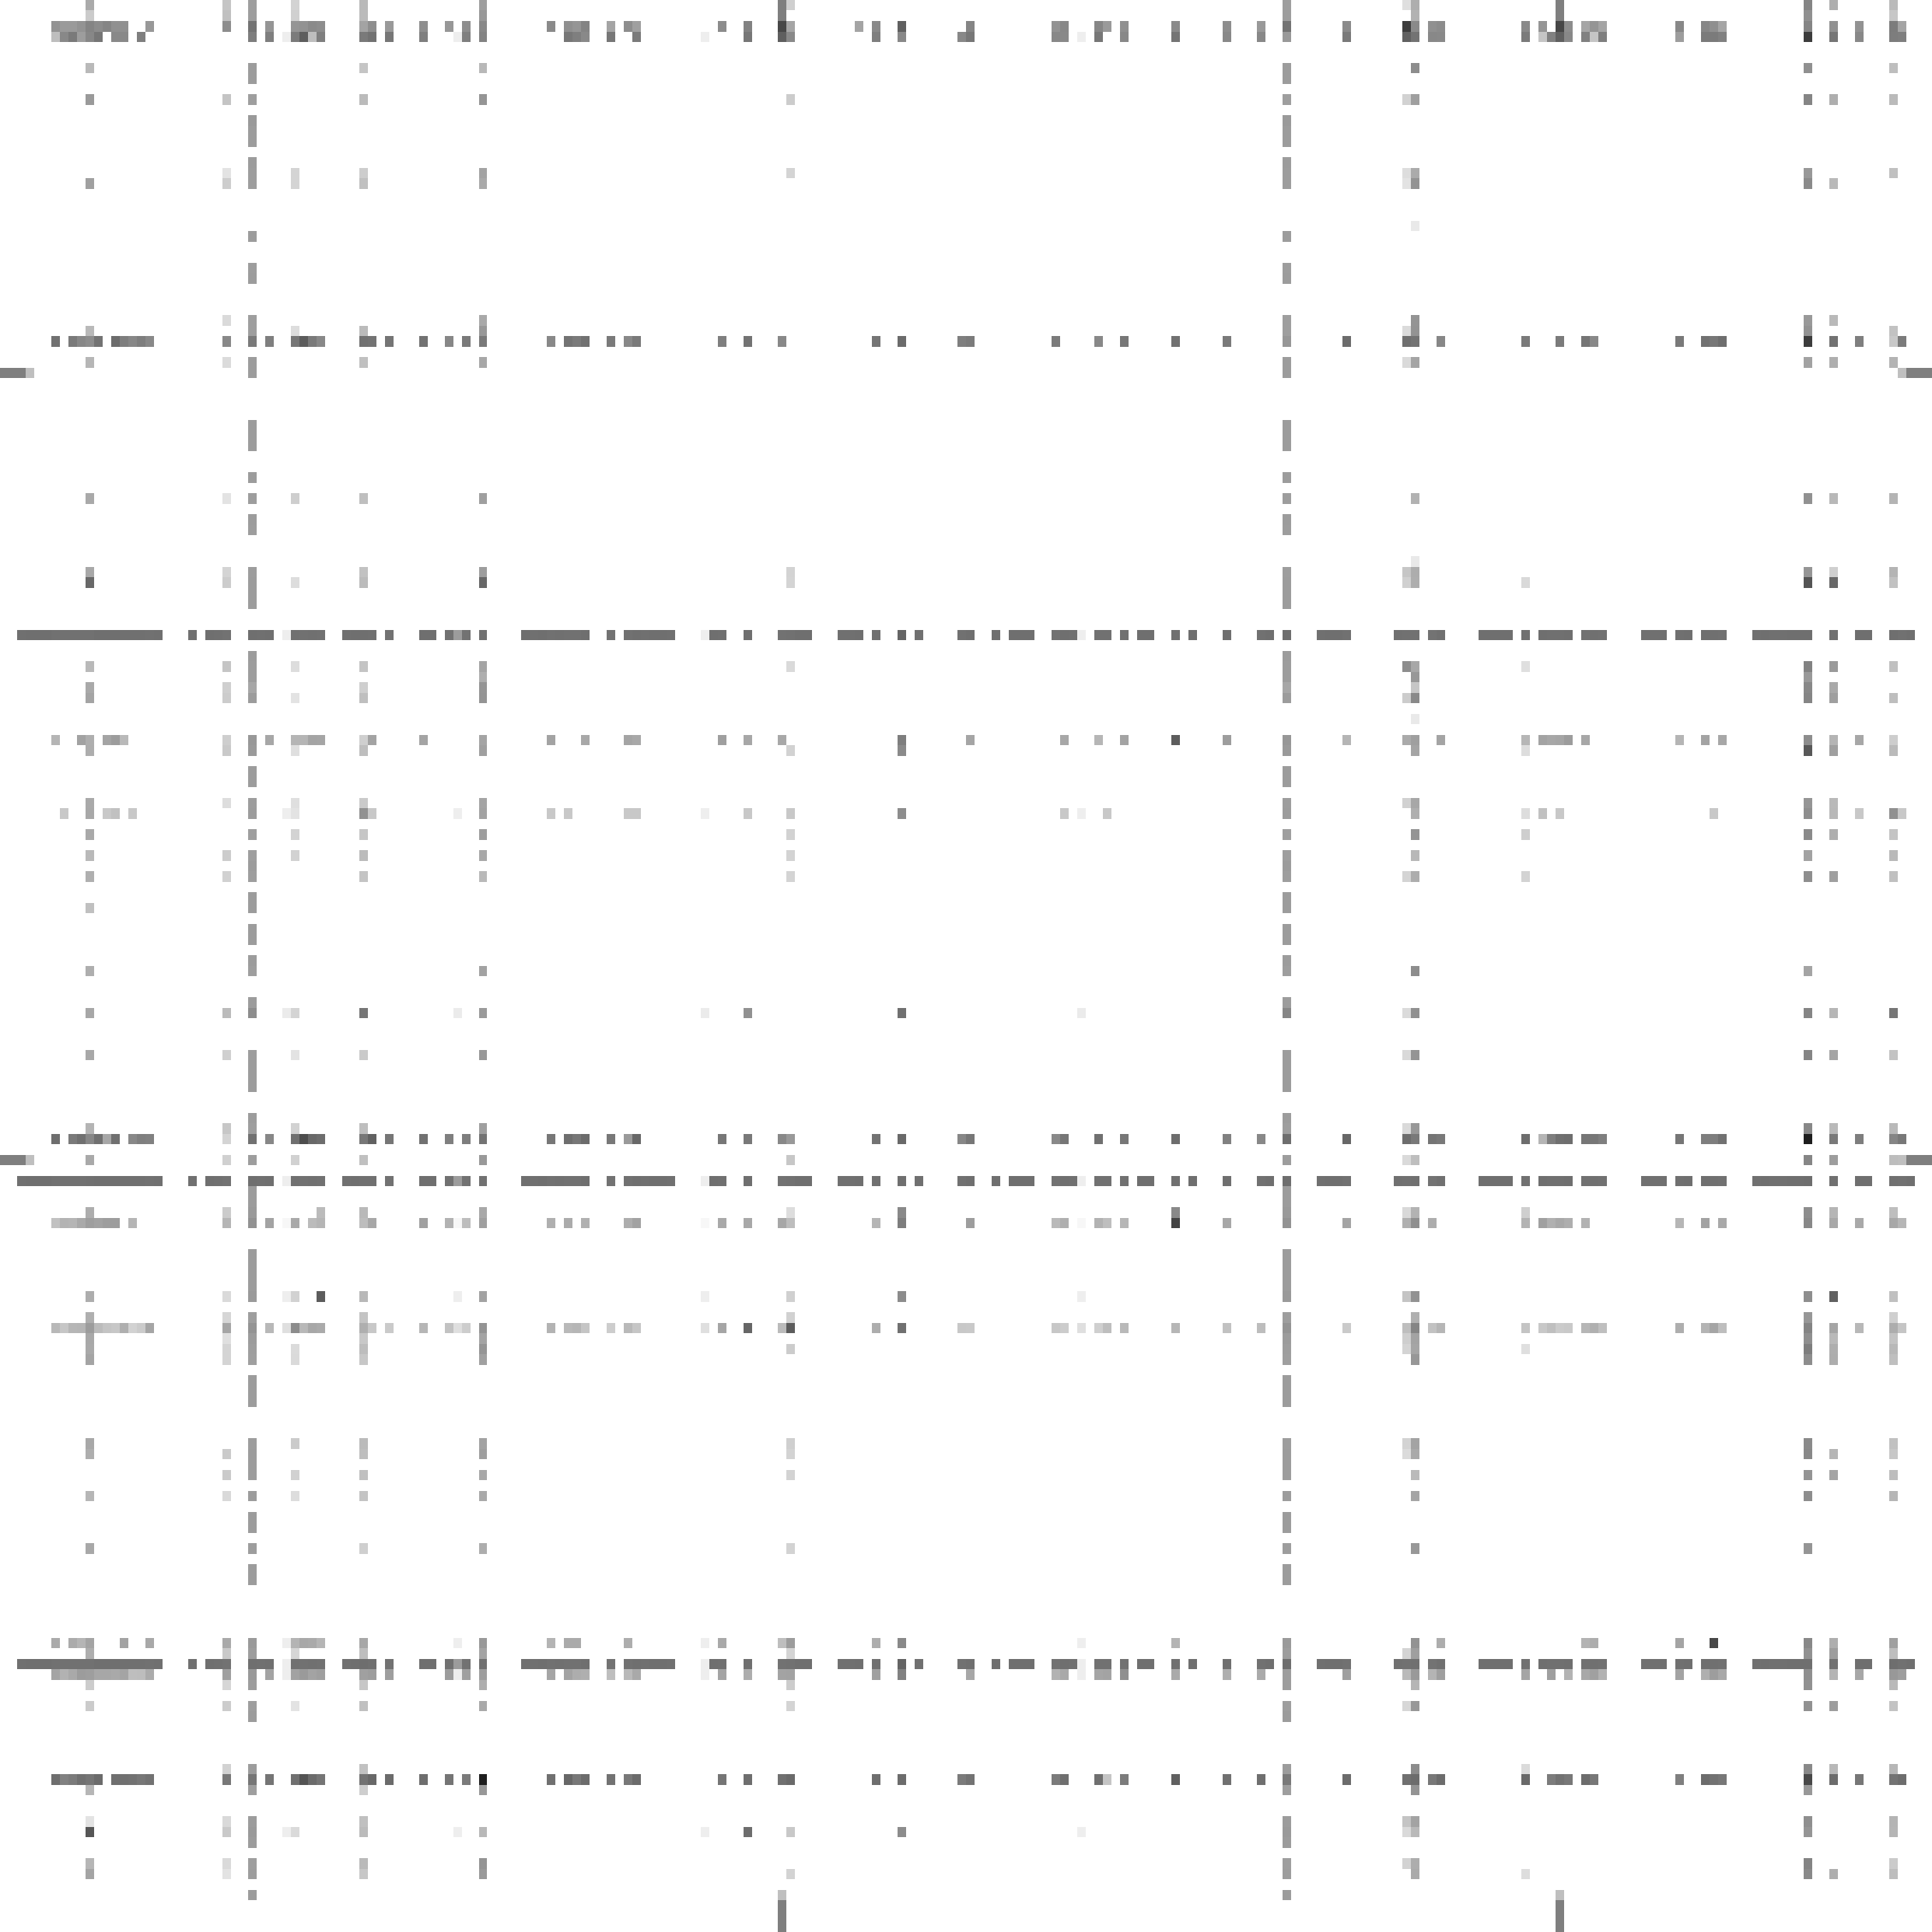

In [39]:
im = im.resize((2484, 2484))   # there are approximately 2484 nodes
im

In [40]:
im_array = np.array(im.getdata()).reshape((2484, 2484))
im_array[10][::100]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 127, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 127, 255, 255, 255, 255])

In [41]:
im_array = (255-im_array)/255 # scale to [0, 1]
im_array = im_array*8         # scale to [0, 8]
im_array[10][::100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       4.01568627, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       4.01568627, 0.        , 0.        , 0.        , 0.        ])

In [42]:
im_array = np.power(10., im_array)  # scale to [0, 1e8]
im_array[10][::100]

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0367792e+04, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0367792e+04, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00])

In [43]:
im_array = np.where(im_array<=1, 0, im_array)  # the 1 should be 0 traffic
im_array[10][::100]

array([    0.       ,     0.       ,     0.       ,     0.       ,
           0.       ,     0.       ,     0.       ,     0.       ,
           0.       ,     0.       , 10367.7919706,     0.       ,
           0.       ,     0.       ,     0.       ,     0.       ,
           0.       ,     0.       ,     0.       ,     0.       ,
       10367.7919706,     0.       ,     0.       ,     0.       ,
           0.       ])

In [44]:
np.savetxt('cluster-4.txt', im_array, delimiter=',')

In [45]:
test = np.loadtxt('cluster-4.txt', delimiter=',')
test[10][::100]

array([    0.       ,     0.       ,     0.       ,     0.       ,
           0.       ,     0.       ,     0.       ,     0.       ,
           0.       ,     0.       , 10367.7919706,     0.       ,
           0.       ,     0.       ,     0.       ,     0.       ,
           0.       ,     0.       ,     0.       ,     0.       ,
       10367.7919706,     0.       ,     0.       ,     0.       ,
           0.       ])